# Breast Cancer Project Kaggle

First import our libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import statsmodels.api as sm
from scipy import stats

import statsmodels.api as sm
from statsmodels.formula.api import ols

Import data with pandas as dataframe:


In [2]:
df = pd.read_csv('data.csv')

In [3]:
#Check the status of the dataframe:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## Data Cleaning:

In [4]:
#Check for Missing Values:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [5]:
#isna() or isnull() to see and sum() to total all true null values for each column:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
# it appears Unnamed 32 has no place here, I drop it
df.drop('Unnamed: 32', 1, inplace=True)

In [7]:
#Check for duplicates:
df.duplicated().sum()

0

We can see some whitespace in a couple of column names

In [8]:
# Eliminate whitespace
df.columns = df.columns.str.replace(' ', '_')
# check for whitespace:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [9]:
#Check for extraneous values

for col in df.columns:
    print(col, '\n', df[col].value_counts(normalize=True).head(), '\n\n')

id 
 883263     0.001757
906564     0.001757
89122      0.001757
9013579    0.001757
868682     0.001757
Name: id, dtype: float64 


diagnosis 
 B    0.627417
M    0.372583
Name: diagnosis, dtype: float64 


radius_mean 
 12.34    0.007030
12.77    0.005272
15.46    0.005272
12.89    0.005272
13.05    0.005272
Name: radius_mean, dtype: float64 


texture_mean 
 14.93    0.005272
15.70    0.005272
18.90    0.005272
16.84    0.005272
17.46    0.005272
Name: texture_mean, dtype: float64 


perimeter_mean 
 82.61     0.005272
134.70    0.005272
87.76     0.005272
130.00    0.003515
58.79     0.003515
Name: perimeter_mean, dtype: float64 


area_mean 
 512.2     0.005272
1214.0    0.003515
399.8     0.003515
758.6     0.003515
1075.0    0.003515
Name: area_mean, dtype: float64 


smoothness_mean 
 0.1007    0.008787
0.1075    0.007030
0.1054    0.007030
0.1150    0.007030
0.1089    0.005272
Name: smoothness_mean, dtype: float64 


compactness_mean 
 0.12060    0.005272
0.11470    0.005272
0

### Screen for Categorical Data


Note that one of our columns 'Diagnosis' has type: Object 

We will have to treat exploratory analysis for this data differently to the other continuous float data sources.

In [10]:
df.info()
#Note 'diagnosis' an object type column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave_points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [11]:
df.shape

(569, 32)

# Exploratory Data Analysis

## Histograms to check Normality of Data:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1bfb8b90>,
      dtype=object)

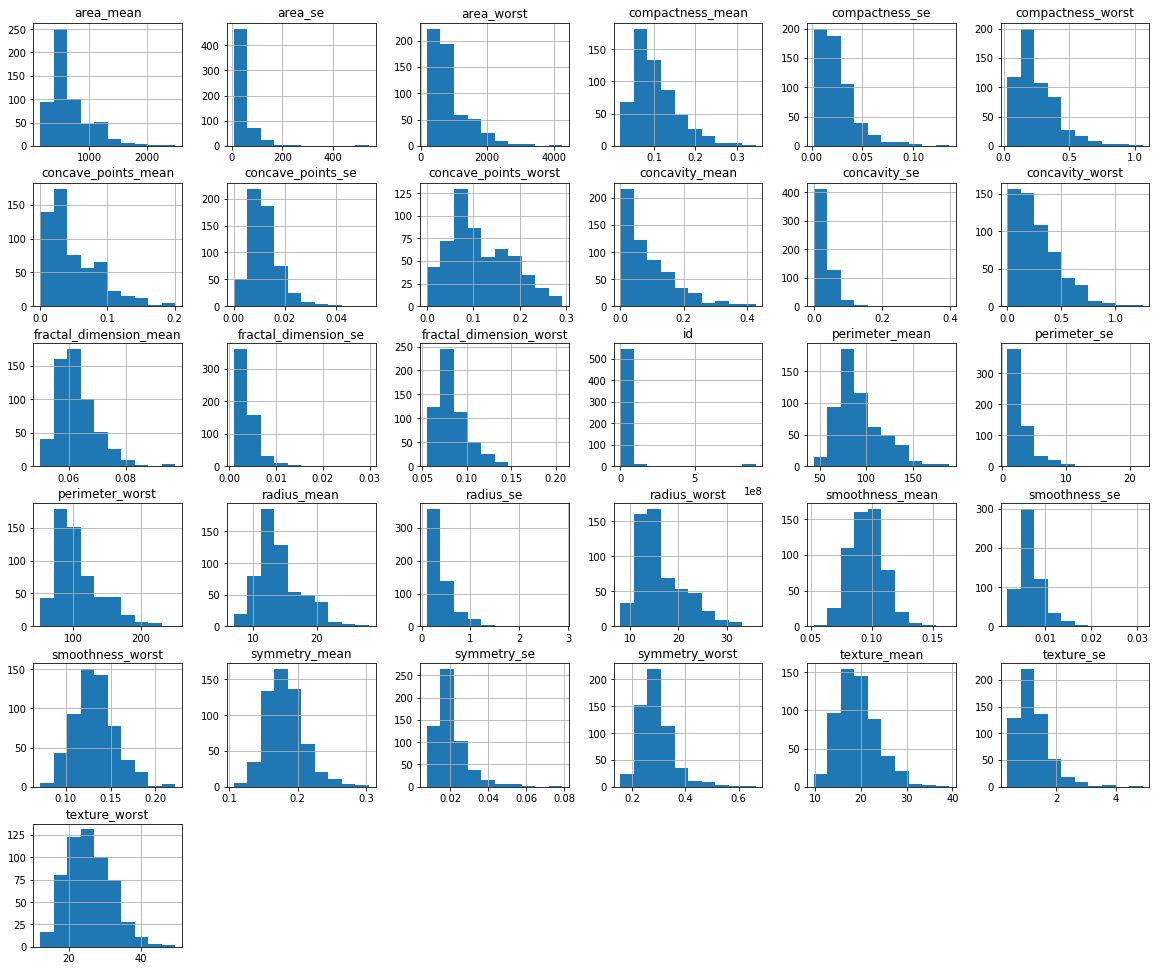

In [12]:
hist = df.hist(figsize=(20,17))
hist

Above we can observe normality of distribution for each feature in the dataset.
There are several features which appear to have a normal distribution including: Texture_worst, Smoothness_worst, Texture_mean, Smoothness_mean and Symmetry_mean. Although These features aren't exempt to outliers and we can look into removing them as necessary down the line.

# Transformation for Standardisation:

In [13]:
df_temp_join = pd.DataFrame()
non_normal = ['area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst']

for feat in non_normal:
    df_temp_join[feat] = df[feat].map(lambda x: np.cbrt(x))


In [14]:
df_norms = df.join(df_temp_join, rsuffix='CBRT_') 
df_norms.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,...,concave_points_worstCBRT_,concavity_meanCBRT_,concavity_worstCBRT_,fractal_dimension_meanCBRT_,fractal_dimension_worstCBRT_,perimeter_meanCBRT_,perimeter_worstCBRT_,radius_meanCBRT_,radius_worstCBRT_,symmetry_worstCBRT_
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,0.642639,0.669507,0.892907,0.428558,0.491731,4.970493,5.693910,2.620256,2.938758,0.772000
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.570827,0.442935,0.622824,0.384106,0.446508,5.103189,5.415229,2.739963,2.923628,0.650296
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.624025,0.582258,0.766536,0.391465,0.444087,5.065797,5.342649,2.700320,2.867168,0.712234
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.636198,0.622653,0.882330,0.460164,0.557205,4.264976,4.624039,2.251932,2.461270,0.872327
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.545696,0.582848,0.736806,0.388925,0.425027,5.131194,5.339143,2.727474,2.824780,0.618324


Make a new df (dataframe_normalised) which drops unnecessary non-normalised values and values we know we il not use(any standard error columns)

In [15]:
df_normalised = df_norms.drop(['radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se', 'fractal_dimension_se'], axis = 1)

In [16]:
df_normalised = df_normalised.drop(['id','area_mean', 'area_worst', 'compactness_mean', 'compactness_worst', 'concave_points_mean', 'concave_points_worst', 'concavity_mean', 'concavity_worst', 'fractal_dimension_mean', 'fractal_dimension_worst', 'perimeter_mean', 'perimeter_worst', 'radius_mean', 'radius_worst', 'symmetry_worst'], axis = 1)

In [17]:
df_normalised.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,area_meanCBRT_,area_worstCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,...,concave_points_worstCBRT_,concavity_meanCBRT_,concavity_worstCBRT_,fractal_dimension_meanCBRT_,fractal_dimension_worstCBRT_,perimeter_meanCBRT_,perimeter_worstCBRT_,radius_meanCBRT_,radius_worstCBRT_,symmetry_worstCBRT_
0,M,10.38,0.11840,0.2419,17.33,0.1622,10.003332,12.638982,0.652339,0.873114,...,0.642639,0.669507,0.892907,0.428558,0.491731,4.970493,5.693910,2.620256,2.938758,0.772000
1,M,17.77,0.08474,0.1812,23.41,0.1238,10.986209,12.506130,0.428431,0.571440,...,0.570827,0.442935,0.622824,0.384106,0.446508,5.103189,5.415229,2.739963,2.923628,0.650296
2,M,21.25,0.10960,0.2069,25.53,0.1444,10.635434,11.955856,0.542770,0.751552,...,0.624025,0.582258,0.766536,0.391465,0.444087,5.065797,5.342649,2.700320,2.867168,0.712234
3,M,20.38,0.14250,0.2597,26.50,0.2098,7.281708,8.280177,0.657237,0.953285,...,0.636198,0.622653,0.882330,0.460164,0.557205,4.264976,4.624039,2.251932,2.461270,0.872327
4,M,14.34,0.10030,0.1809,16.67,0.1374,10.905527,11.634834,0.510191,0.589637,...,0.545696,0.582848,0.736806,0.388925,0.425027,5.131194,5.339143,2.727474,2.824780,0.618324


# Check distribution again

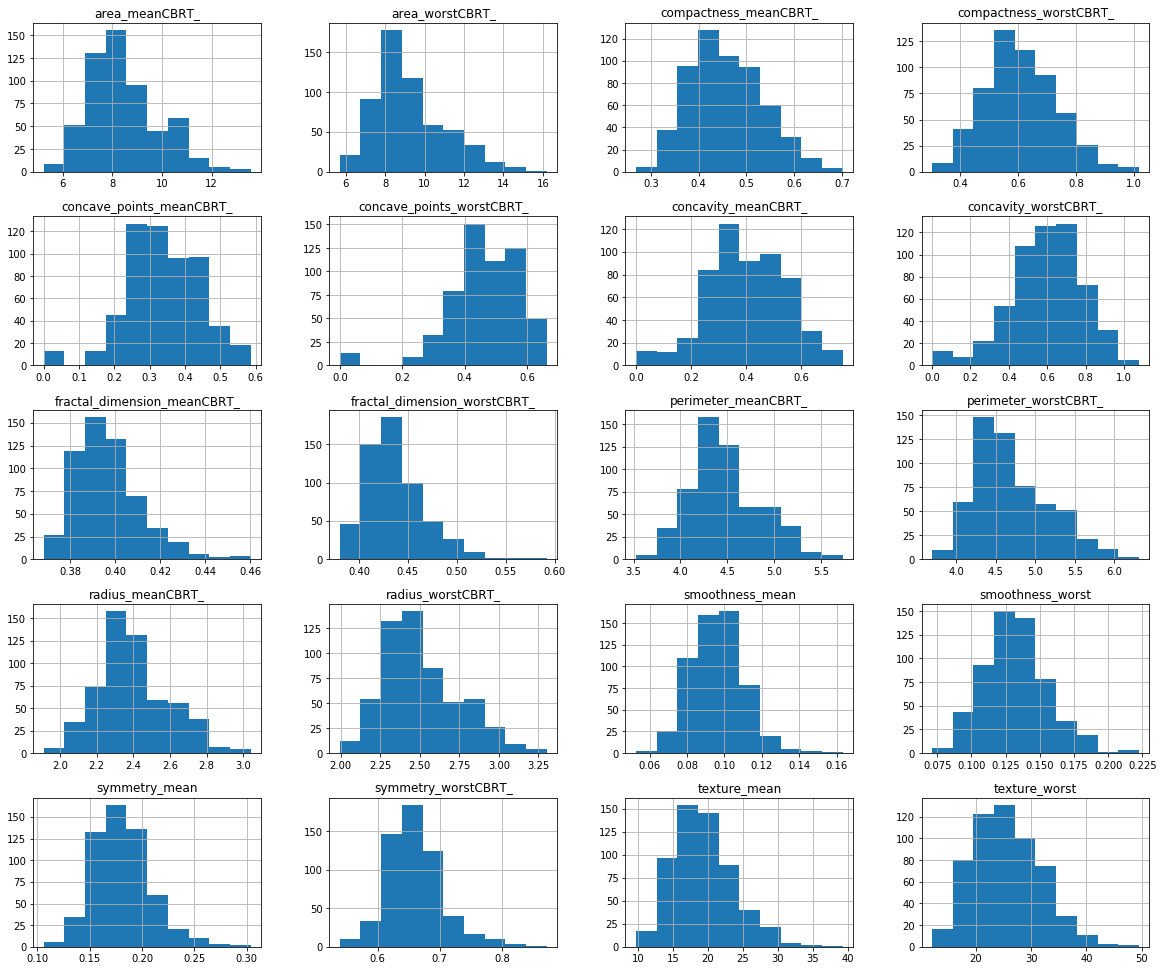

In [18]:
normalised_hist = df_normalised.hist(figsize=(20,17))

# Address Outliers

Due to losing almost half the data, we chose not to include the proces below outlined here:
- calculate quartile 0.25 , 0.75 and IQR and remove all IQR*1.5 vallues above and below the upper and lower quartiles


In [19]:
# #Below I create upper and lower quartiles to evaluate IQR and therefore IQR*1.5 
# Q1 = df2.quantile(0.25)
# Q3 = df2.quantile(0.75)
# IQR = Q3 - Q1
# cons=IQR*1.5
# print(cons)

# 5.369000e-02

In [20]:
# #these iqr*1.5 values will be used to eliminate outliers in following code
# upper_outlier = Q3+cons
# lower_outlier = Q1-cons
# print(upper_outlier)
# print('-------------')
# # print(lower_outlier)


In [21]:
#Check the datatype of the outlier values 
# type(upper_outlier), type(lower_outlier)

In [22]:
#They are pandas series, a quick google shows we can loop through them 
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1

# df3 = df2[~((df2 < (Q1 - 1.5 * IQR)) |(df2 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [23]:
# df3.hist(figsize=(20,17))

In [24]:
# df2.hist(figsize=(20,17))

# Correlation Heatmap

In [25]:
#A correlation table using pandas:
corr_matrix = df_normalised.corr()
corr_matrix

,texture_mean,smoothness_mean,symmetry_mean,texture_worst,smoothness_worst,area_meanCBRT_,area_worstCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,concave_points_meanCBRT_,concave_points_worstCBRT_,concavity_meanCBRT_,concavity_worstCBRT_,fractal_dimension_meanCBRT_,fractal_dimension_worstCBRT_,perimeter_meanCBRT_,perimeter_worstCBRT_,radius_meanCBRT_,radius_worstCBRT_,symmetry_worstCBRT_
texture_mean,1.000000,-0.023389,0.071401,0.912045,0.077503,0.325592,0.352119,0.230639,0.262881,0.237696,0.208601,0.270109,0.248394,-0.076932,0.114516,0.326366,0.356299,0.320878,0.350932,0.100861
smoothness_mean,-0.023389,1.000000,0.557775,0.036072,0.805324,0.155372,0.199625,0.681359,0.492410,0.544865,0.454480,0.512388,0.415842,0.589283,0.508907,0.195074,0.231312,0.157786,0.205855,0.393347
symmetry_mean,0.071401,0.557775,1.000000,0.090651,0.426675,0.134316,0.172572,0.580965,0.460170,0.405599,0.336665,0.434776,0.359256,0.477633,0.440526,0.169579,0.209429,0.134964,0.177909,0.710013
texture_worst,0.912045,0.036072,0.090651,1.000000,0.225429,0.302180,0.362709,0.248428,0.349963,0.264019,0.286758,0.295638,0.330662,-0.050587,0.215920,0.306057,0.369140,0.299564,0.363120,0.233037
smoothness_worst,0.077503,0.805324,0.426675,0.225429,1.000000,0.110138,0.206548,0.593904,0.590230,0.473646,0.500071,0.478712,0.506522,0.509538,0.630218,0.142278,0.232233,0.110049,0.210804,0.505493
area_meanCBRT_,0.325592,0.155372,0.134316,0.302180,0.110138,1.000000,0.974081,0.498341,0.448710,0.762087,0.673420,0.657675,0.559168,-0.339274,0.002767,0.996316,0.971504,0.998325,0.976491,0.159117
area_worstCBRT_,0.352119,0.199625,0.172572,0.362709,0.206548,0.974081,1.000000,0.531088,0.507841,0.769257,0.698064,0.673179,0.594319,-0.282850,0.089679,0.968900,0.991293,0.968526,0.997497,0.238070
compactness_meanCBRT_,0.230639,0.681359,0.580965,0.248428,0.593904,0.498341,0.531088,1.000000,0.896918,0.819165,0.757629,0.872373,0.802562,0.543763,0.695459,0.551838,0.593410,0.502362,0.541446,0.490091
compactness_worstCBRT_,0.262881,0.492410,0.460170,0.349963,0.590230,0.448710,0.507841,0.896918,1.000000,0.731153,0.782451,0.820687,0.879983,0.437888,0.785102,0.499869,0.575630,0.456412,0.521817,0.589192
concave_points_meanCBRT_,0.237696,0.544865,0.405599,0.264019,0.473646,0.762087,0.769257,0.819165,0.731153,1.000000,0.941479,0.940580,0.849585,0.137901,0.387230,0.794762,0.805151,0.767540,0.780695,0.358901


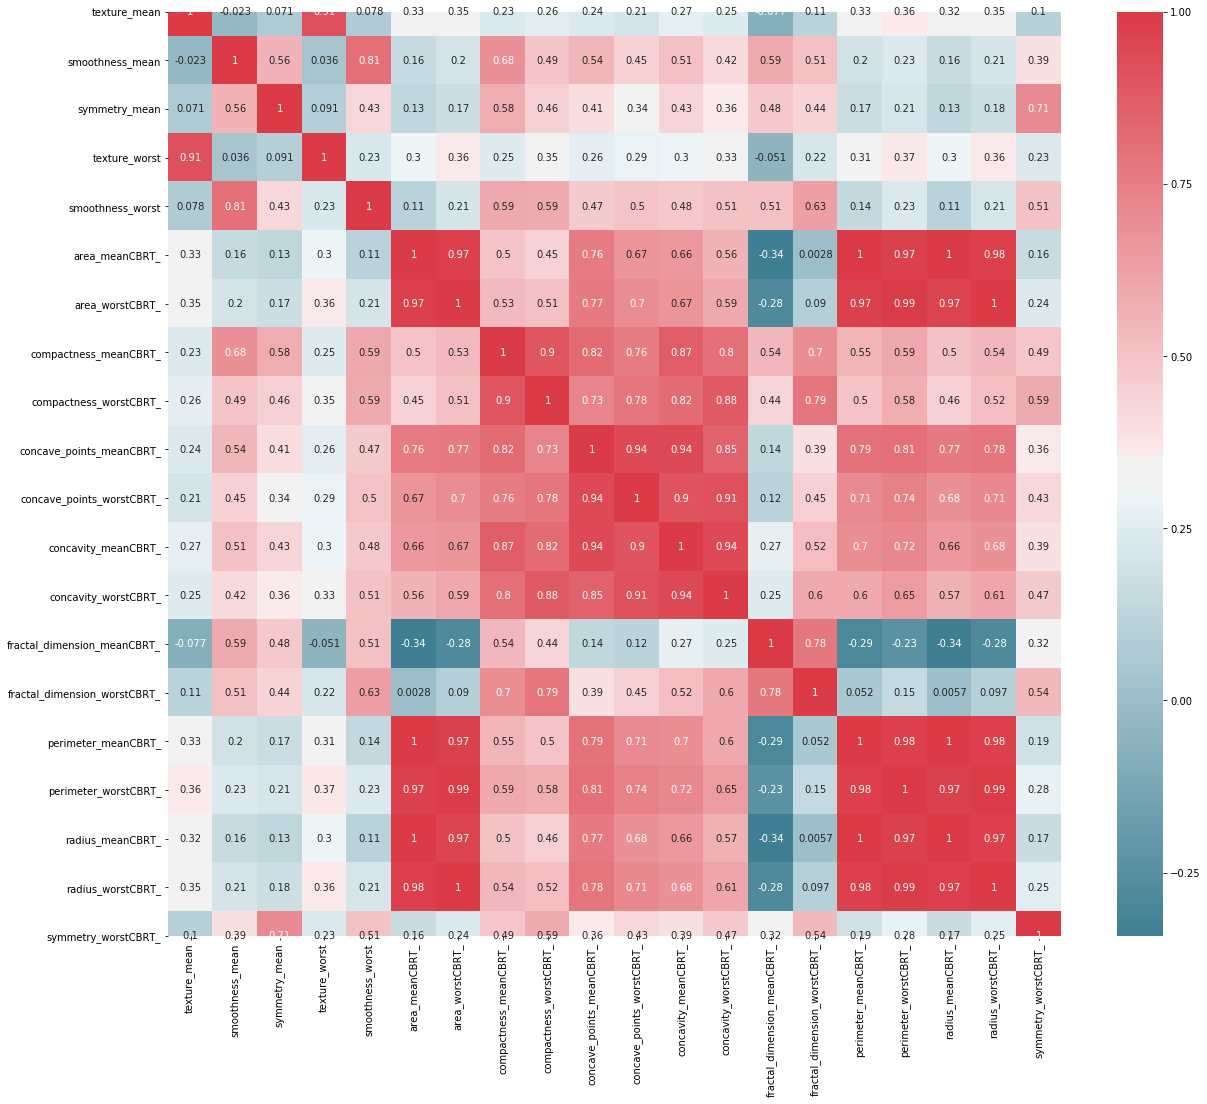

In [26]:
# Heatmap using Seaborn:
def correlation_heatmap(df_normalised):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(df_normalised.corr(),annot=True,cmap=colormap)
correlation_heatmap(df_normalised)

Second Heatmap for interest purposes:

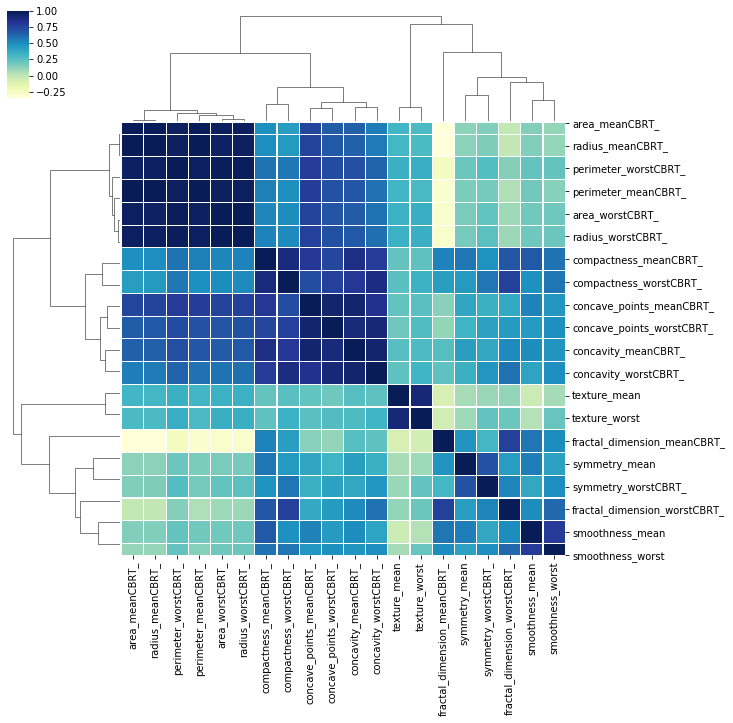

In [27]:
#Second Heatmap for comparison and interest
corrmat = df_normalised.corr() 
cg = sns.clustermap(corrmat, cmap ="YlGnBu", linewidths = 0.1); 
plt.setp(cg.ax_heatmap.yaxis.get_majorticklabels(), rotation = 0) 
cg 


## Removing features that are too closely related (>0.9)

In [28]:
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


# Find index of feature columns with correlation greater than 0.9
to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]


to_drop

# Drop features
non_corr_df = df_normalised.drop(['texture_worst', 'area_worstCBRT_', 'concave_points_worstCBRT_', 'concavity_meanCBRT_', 'concavity_worstCBRT_', 'perimeter_meanCBRT_', 'perimeter_worstCBRT_', 'radius_meanCBRT_',
 'radius_worstCBRT_'], axis = 1)

non_corr_df.info()
non_corr_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 12 columns):
diagnosis                       569 non-null object
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
fractal_dimension_meanCBRT_     569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float64
symmetry_worstCBRT_             569 non-null float64
dtypes: float64(11), object(1)
memory usage: 53.5+ KB


(569, 12)

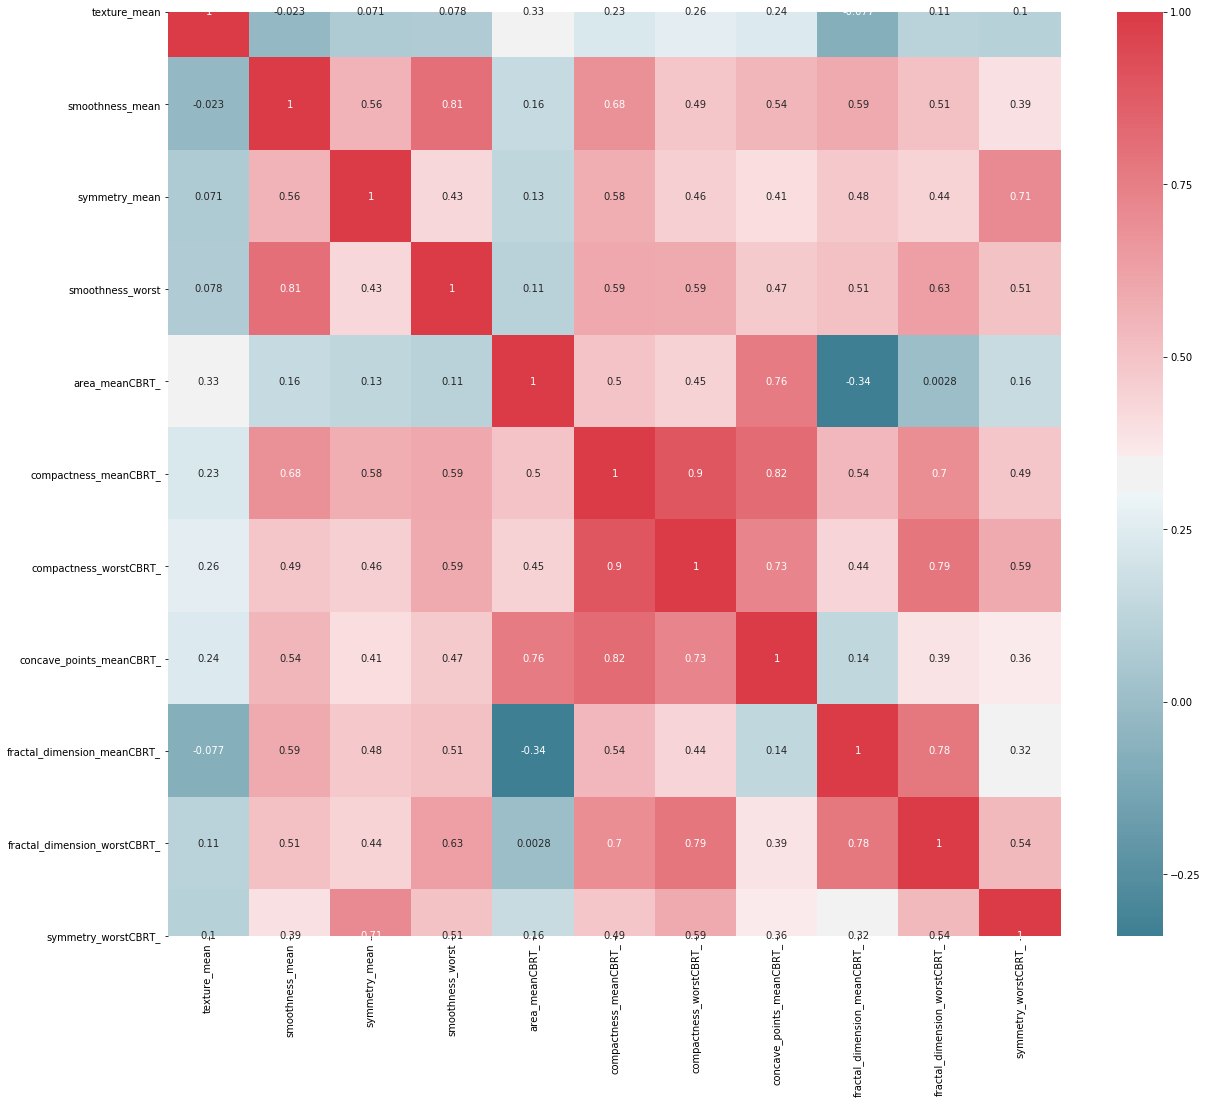

In [29]:
def correlation_heatmap(non_corr_df):
    _,ax=plt.subplots(figsize=(20,17))
    colormap=sns.diverging_palette(220,10,as_cmap=True)
    sns.heatmap(non_corr_df.corr(),annot=True,cmap=colormap)
correlation_heatmap(non_corr_df)

### Pairwise plot with Seaborn to show 

In [30]:
#Create a subset to make a pairwise plot with from the new non-correlated Df:
non_corr_df_subset1 = non_corr_df.iloc[:,1:6]
non_corr_df_subset1.shape


(569, 5)

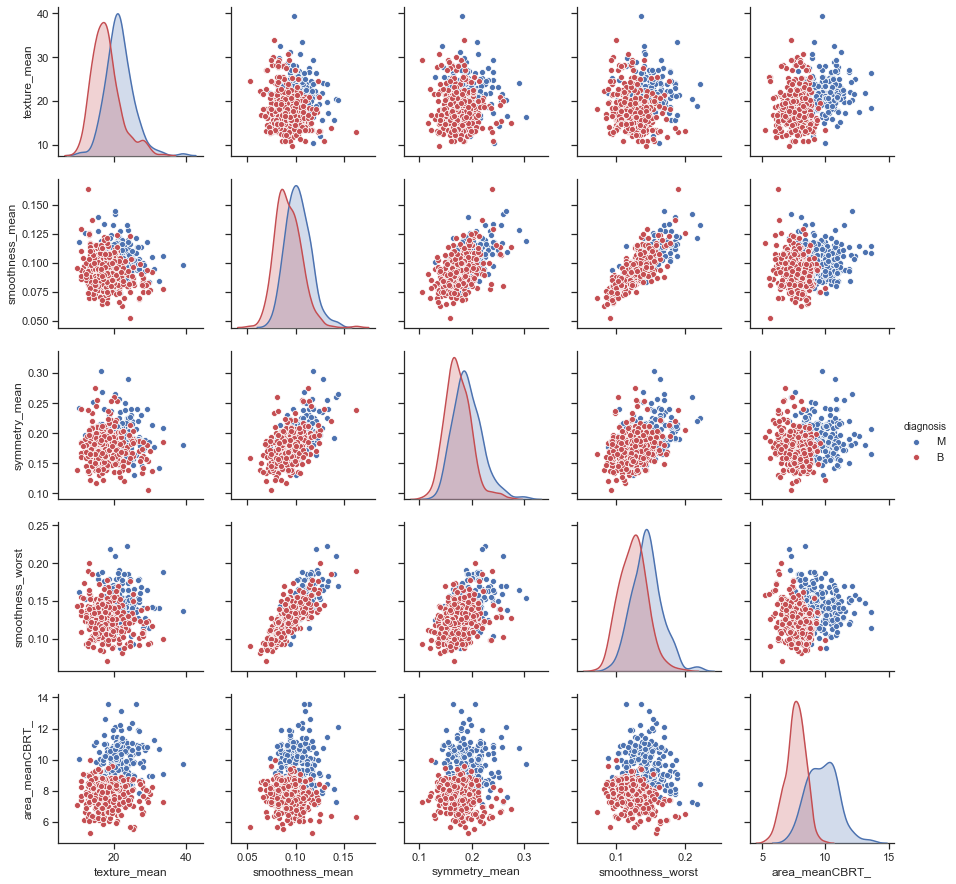

In [31]:
# sns is a seaborn object
non_corr_df_subset1['diagnosis'] = non_corr_df['diagnosis']
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(non_corr_df_subset1, palette = ('b', 'r'), hue="diagnosis", height=2.5)
plt.show()

In [32]:
# non_corr_df_subset2 = non_corr_df.iloc[:,6:11]
# non_corr_df_subset2['diagnosis'] = df['diagnosis']
# sns.set(style="ticks", color_codes=True)
# g = sns.pairplot(non_corr_df_subset2, palette = ('b', 'r'), hue="diagnosis", height=2.5)
# plt.show()
# g = sns.PairGrid()
# g.map_diag(sns.kdeplot)
# g.map_offdiag(sns.kdeplot, n_levels=6);

# Using T-Test to check difference between means of two groups:


Means of benign features vs Means of Malignant features

According to the EDA above we have isolated four features ('area_meanCBRT_', 'compactness_meanCBRT_', 'compactness_worstCBRT_', 'concave_points_meanCBRT_') that are most likely to reognise a malignant cell from a benign cell.

Below are plots of bivariate histograms for the four features and Welch's T-test results
Welch's T-test used instead of students due to the unequal sample size between the diagnosis groups.

as a side note we initally tried a Groupby but the aggregate function mean() gave one value - a mean - for each diagnosis group (malignant and benign). Therefore the degrees of freedom was 0 for the test and the t-test returned this error.

### Plots of bivariate histograms for four isolated features

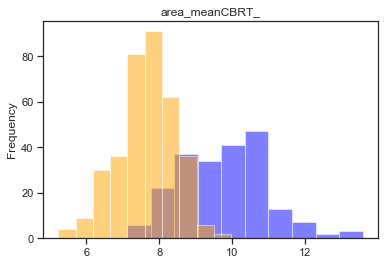

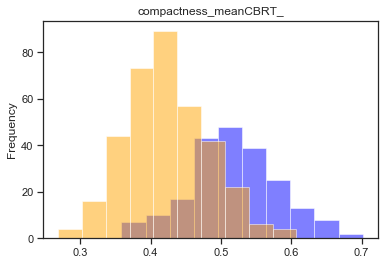

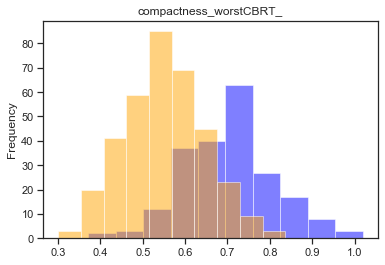

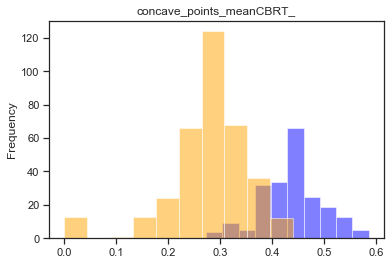

In [33]:
for i in ['area_meanCBRT_', 'compactness_meanCBRT_', 'compactness_worstCBRT_', 'concave_points_meanCBRT_']: 
    plt.figure()
    non_corr_df[i]
   
    non_corr_df[i][non_corr_df['diagnosis'] =='M'].plot.hist(alpha = 0.5, color='blue', title = i)
    non_corr_df[i][non_corr_df['diagnosis'] =='B'].plot.hist(alpha = 0.5, color='orange', title = i)
    plt.show()

Taking the column for Area_mean transformed to cuberoots we seperate Benighn values from Malignant and feed them to the T-test:

# Welch's T-Test's for the four features selected:

# T-Test For loop:

In [34]:
df_t_test_feat = non_corr_df.drop('diagnosis',1)
for i in df_t_test_feat.columns:
    t_results = []
    i1=non_corr_df.loc[non_corr_df['diagnosis'] == 'B', i]
    i2=non_corr_df.loc[non_corr_df['diagnosis'] == 'M', i]
    t_results.append(f'{i} ----------- {stats.ttest_ind(i1,i2, equal_var = False)}')
    print(t_results)

['texture_mean ----------- Ttest_indResult(statistic=-11.022086546579432, pvalue=3.019055292193917e-25)']
['smoothness_mean ----------- Ttest_indResult(statistic=-9.297355109660026, pvalue=5.573331322107757e-19)']
['symmetry_mean ----------- Ttest_indResult(statistic=-8.112197650883767, pvalue=5.957650760938452e-15)']
['smoothness_worst ----------- Ttest_indResult(statistic=-10.819553043932244, pvalue=3.4743759425754134e-24)']
['area_meanCBRT_ ----------- Ttest_indResult(statistic=-23.110843802296564, pvalue=8.230229504425566e-70)']
['compactness_meanCBRT_ ----------- Ttest_indResult(statistic=-17.60543840086473, pvalue=5.6076017879557874e-52)']
['compactness_worstCBRT_ ----------- Ttest_indResult(statistic=-17.308347489613826, pvalue=1.8454243290055847e-50)']
['concave_points_meanCBRT_ ----------- Ttest_indResult(statistic=-27.60111008394631, pvalue=3.2672669905208683e-105)']
['fractal_dimension_meanCBRT_ ----------- Ttest_indResult(statistic=0.41846312326450774, pvalue=0.675835212957

we can see that 'fractal_dimension_meanCBRT_' has a pvalue of 0.68, it can be dropped.


In [35]:
non_corr_df.drop('fractal_dimension_meanCBRT_', 1, inplace=True)
non_corr_df.columns

Index(['diagnosis', 'texture_mean', 'smoothness_mean', 'symmetry_mean',
       'smoothness_worst', 'area_meanCBRT_', 'compactness_meanCBRT_',
       'compactness_worstCBRT_', 'concave_points_meanCBRT_',
       'fractal_dimension_worstCBRT_', 'symmetry_worstCBRT_'],
      dtype='object')

In [36]:
#Convert to diagnosisgroups to binary format:
model_DF = pd.DataFrame()
model_DF=non_corr_df
model_DF['diagnosis'] = non_corr_df['diagnosis'].map({'M': 1, 'B': 0})

In [37]:
model_DF.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_meanCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,concave_points_meanCBRT_,fractal_dimension_worstCBRT_,symmetry_worstCBRT_
0,1,10.38,0.11840,0.2419,0.1622,10.003332,0.652339,0.873114,0.527883,0.491731,0.772000
1,1,17.77,0.08474,0.1812,0.1238,10.986209,0.428431,0.571440,0.412462,0.446508,0.650296
2,1,21.25,0.10960,0.2069,0.1444,10.635434,0.542770,0.751552,0.503837,0.444087,0.712234
3,1,20.38,0.14250,0.2597,0.2098,7.281708,0.657237,0.953285,0.472069,0.557205,0.872327
4,1,14.34,0.10030,0.1809,0.1374,10.905527,0.510191,0.589637,0.470719,0.425027,0.618324


In [38]:
model_DF.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 11 columns):
diagnosis                       569 non-null int64
texture_mean                    569 non-null float64
smoothness_mean                 569 non-null float64
symmetry_mean                   569 non-null float64
smoothness_worst                569 non-null float64
area_meanCBRT_                  569 non-null float64
compactness_meanCBRT_           569 non-null float64
compactness_worstCBRT_          569 non-null float64
concave_points_meanCBRT_        569 non-null float64
fractal_dimension_worstCBRT_    569 non-null float64
symmetry_worstCBRT_             569 non-null float64
dtypes: float64(10), int64(1)
memory usage: 49.0 KB


# Ordinary Least Square

In [39]:
model_data = model_DF

In [42]:
model_data.head()

,diagnosis,texture_mean,smoothness_mean,symmetry_mean,smoothness_worst,area_meanCBRT_,compactness_meanCBRT_,compactness_worstCBRT_,concave_points_meanCBRT_,fractal_dimension_worstCBRT_,symmetry_worstCBRT_
0,1,10.38,0.11840,0.2419,0.1622,10.003332,0.652339,0.873114,0.527883,0.491731,0.772000
1,1,17.77,0.08474,0.1812,0.1238,10.986209,0.428431,0.571440,0.412462,0.446508,0.650296
2,1,21.25,0.10960,0.2069,0.1444,10.635434,0.542770,0.751552,0.503837,0.444087,0.712234
3,1,20.38,0.14250,0.2597,0.2098,7.281708,0.657237,0.953285,0.472069,0.557205,0.872327
4,1,14.34,0.10030,0.1809,0.1374,10.905527,0.510191,0.589637,0.470719,0.425027,0.618324


In [44]:
outcome = 'diagnosis'
predictors = model_DF.drop('diagnosis', axis=1)
pred_sum = "+".join(predictors.columns)
formula = outcome + "~" + pred_sum

model = ols(formula= formula, data= model_data).fit()

In [45]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              diagnosis   R-squared:                       0.717
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     141.7
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          4.81e-146
Time:                        17:09:42   Log-Likelihood:                -34.254
No. Observations:                 569   AIC:                             90.51
Df Residuals:                     558   BIC:                             138.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
Intercept                       -4.0944      0.362    -11.296      0.000      -4.806      -3.382
texture_mean                     0.0195      0.003      6.985      0.000       0.014       0.025
smoothness_mean                 -1.9390      2.028     -0.956      0.340      -5.923       2.045
symmetry_mean                    0.4833      0.753      0.642      0.521      -0.996       1.962
smoothness_worst                 4.6579      1.066      4.371      0.000       2.565       6.751
area_meanCBRT_                   0.1953      0.016     12.533      0.000       0.165       0.226
compactness_meanCBRT_           -0.6416      0.603     -1.063      0.288      -1.827       0.544
compactness_worstCBRT_          -0.2944      0.343     -0.858      0.391      -0.968       0.379
concave_points_meanCBRT_         0.9387      0.271      3.461      0.001       0.406       1.471
fractal_dimension_worstCBRT_     2.6669      0.818      3.261      0.001       1.060       4.273
symmetry_worstCBRT_              1.3917      0.463      3.004      0.003       0.482       2.302
==============================================================================
Omnibus:                       23.236   Durbin-Watson:                   1.651
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.338
Skew:                           0.517   Prob(JB):                     3.15e-06
Kurtosis:                       3.007   Cond. No.                     4.42e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.42e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""